In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned non-encoded data for easier categorical analysis
df = pd.read_csv("../Data/coupon_data_cleaned.csv")

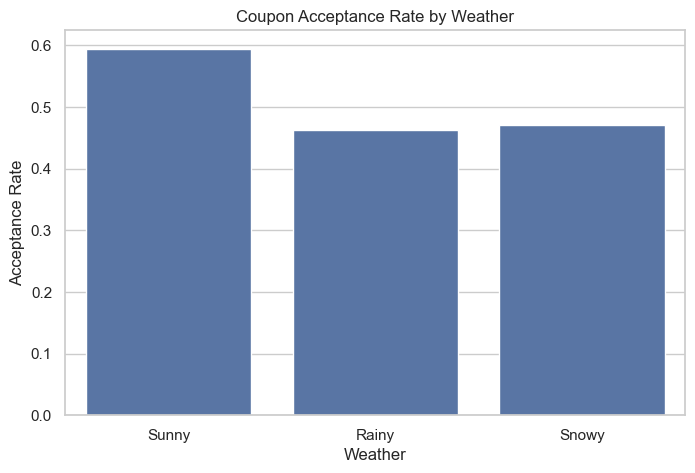

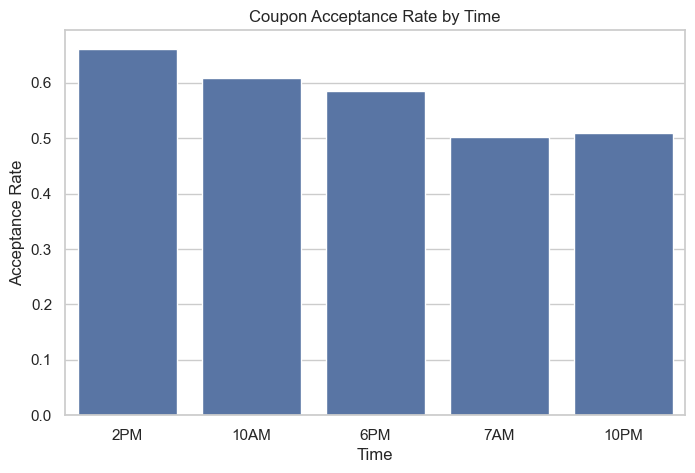

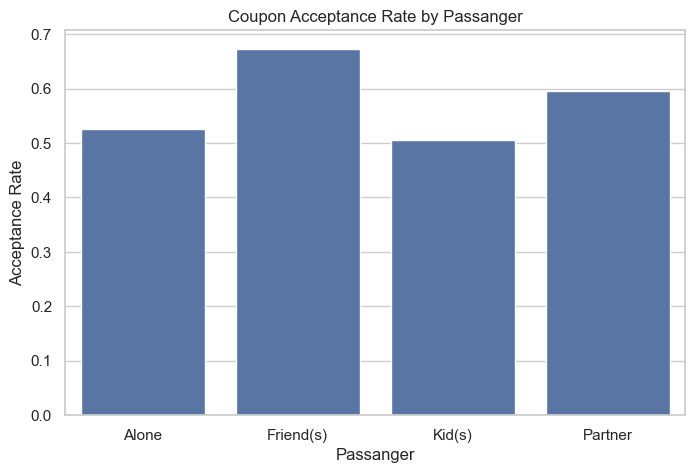

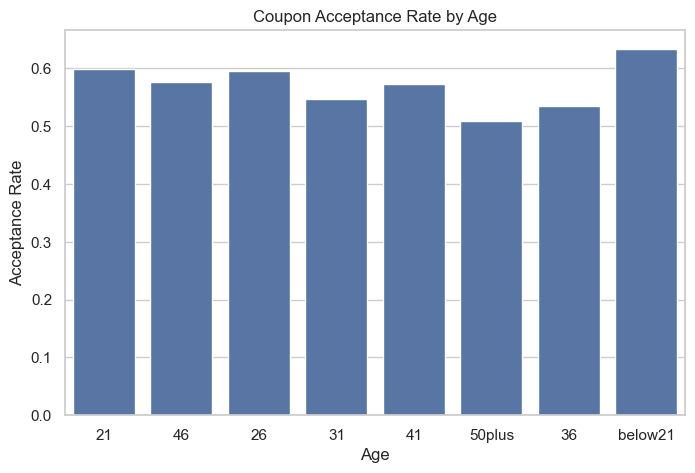

In [14]:
# Setting plot style
sns.set(style="whitegrid")

# Listing of categorical features to analyze
cat_features = ['weather', 'time', 'passanger', 'age']

# Plot acceptance rate (Y=1) per category
for feature in cat_features:
    plt.figure(figsize=(8,5))
    sns.barplot(x=feature, y='Y', data=df, errorbar=None)
    plt.title(f"Coupon Acceptance Rate by {feature.capitalize()}")
    plt.ylabel("Acceptance Rate")
    plt.xlabel(feature.capitalize())
    plt.show()

In [15]:
# Loop through categorical features to calculate and print acceptance rates
for feature in cat_features:
    print(f"Acceptance rate by {feature}:")
    
    # Group by the feature and calculate the mean acceptance rate (Y=1)
    acceptance_rate = df.groupby(feature)['Y'].mean().sort_values(ascending=False)
    
    # Print acceptance rates sorted from highest to lowest
    print(acceptance_rate)
    print("\n")  # Add space between feature outputs


Acceptance rate by weather:
weather
Sunny    0.594796
Snowy    0.470463
Rainy    0.462810
Name: Y, dtype: float64


Acceptance rate by time:
time
2PM     0.661523
10AM    0.608352
6PM     0.584520
10PM    0.508475
7AM     0.502212
Name: Y, dtype: float64


Acceptance rate by passanger:
passanger
Friend(s)    0.673438
Partner      0.595349
Alone        0.525804
Kid(s)       0.504970
Name: Y, dtype: float64


Acceptance rate by age:
age
below21    0.634369
21         0.598191
26         0.595936
46         0.575802
41         0.572736
31         0.546346
36         0.535254
50plus     0.508949
Name: Y, dtype: float64




In [16]:
# Define numerical features to check correlation with target
numerical_features = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

# Calculate correlation matrix for numerical features plus target 'Y'
correlations = df[numerical_features + ['Y']].corr()

# Extract correlation values of numerical features with target variable 'Y'
target_correlations = correlations['Y'].drop('Y')

# Print the correlation results
print("Correlation of numerical features with coupon acceptance (Y):")
print(target_correlations)

Correlation of numerical features with coupon acceptance (Y):
temperature          0.061240
toCoupon_GEQ5min          NaN
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
Name: Y, dtype: float64


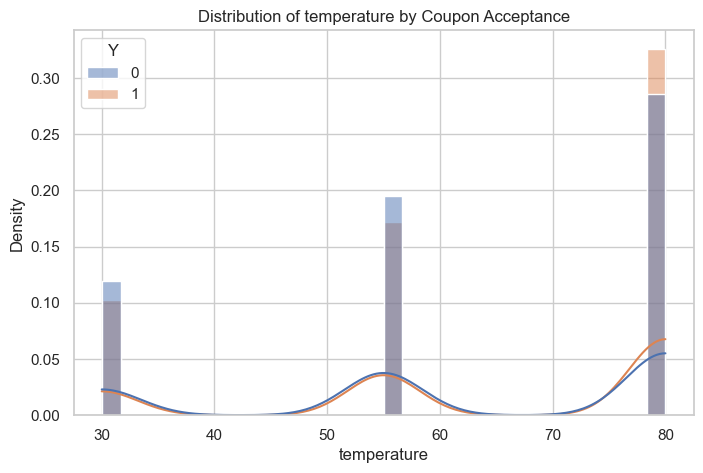

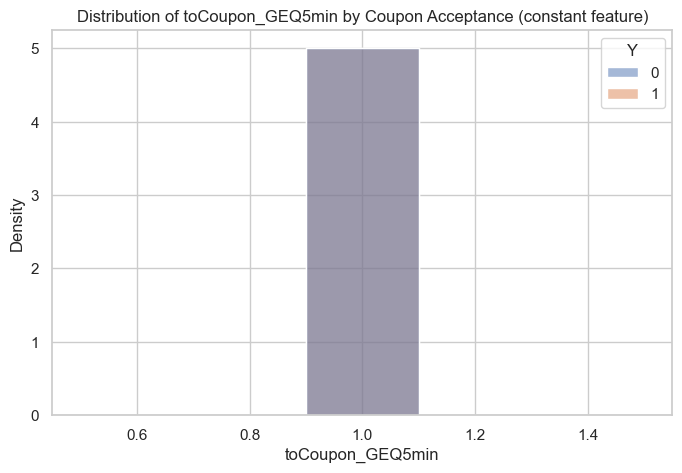

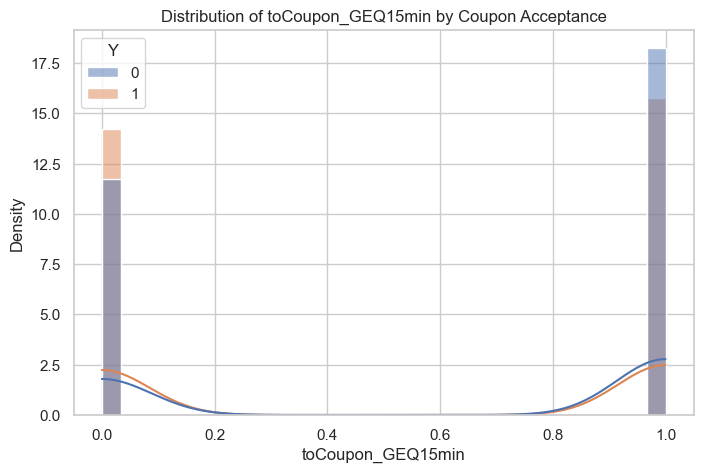

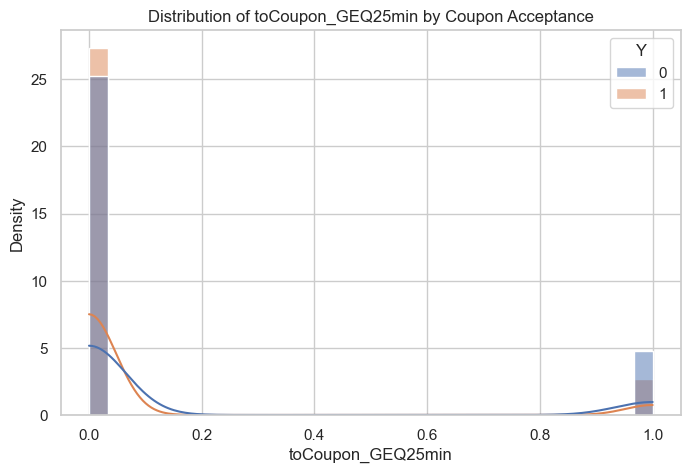

In [19]:
# List of numerical features to visualize
numerical_features = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

for feature in numerical_features:
    plt.figure(figsize=(8,5))
    
    # Check if the feature is constant (only one unique value)
    if df[feature].nunique() == 1:
        # Plot histogram without KDE since KDE fails on constant data
        sns.histplot(data=df, x=feature, hue='Y', kde=False, stat="density", common_norm=False, bins=5)
        plt.title(f"Distribution of {feature} by Coupon Acceptance (constant feature)")
    else:
        # Plot histogram with KDE for features with variation
        sns.histplot(data=df, x=feature, hue='Y', kde=True, stat="density", common_norm=False, bins=30)
        plt.title(f"Distribution of {feature} by Coupon Acceptance")
    
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()